**Quarta Atividade**

**Discente: Valéria Cristina A.R.de Figueredo**

# Regressão Linear com PyTorch

## Objetivo

Este exemplo utiliza regressão linear para estimar o comprimento das sépalas da íris a partir do seu comprimento das pétalas.
Utiliza-se
- o cálculo do gradiente automático do PyTorch, porém
- a função de perda e
- atualização dos parâmetros é feita de forma explícita.
- A rede é criada com uma camada nn.Linear()

![alt text](https://raw.githubusercontent.com/vcasadei/images/master/RegressaoLinear_Otimizacao.png)

## Importação dos pacotes

In [78]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
from sklearn.datasets import load_iris

import torch
from torch import nn, optim
from torch.autograd import Variable

torch.manual_seed(1234)

## Leitura dos dados

In [79]:
iris = load_iris()
data = iris.data[iris.target==1,::2]  # comprimento das sépalas e pétalas, indices 0 e 2

x_train = data[:,0:1].astype(np.float32)
y_train = data[:,1:2].astype(np.float32)

n_samples = x_train.shape[0]
print('x_train.shape:',x_train.shape, x_train.dtype)
print('y_train.shape:',y_train.shape, y_train.dtype)

print('x_train[:5]:\n', x_train[:5])
print('y_train[:5]:\n', y_train[:5])

x_train.shape: (50, 1) float32
y_train.shape: (50, 1) float32
x_train[:5]:
 [[7. ]
 [6.4]
 [6.9]
 [5.5]
 [6.5]]
y_train[:5]:
 [[4.7]
 [4.5]
 [4.9]
 [4. ]
 [4.6]]


### Normalização dos dados

In [80]:
x_train -= x_train.min()
x_train /= x_train.max()
y_train -= y_train.min()
y_train /= y_train.max()


In [81]:
print('x_train[:5]:\n', x_train[:5])
print('y_train[:5]:\n', y_train[:5])

x_train[:5]:
 [[1.        ]
 [0.71428573]
 [0.952381  ]
 [0.28571424]
 [0.7619048 ]]
y_train[:5]:
 [[0.80952376]
 [0.71428573]
 [0.90476197]
 [0.4761905 ]
 [0.7619048 ]]


In [82]:
x_train_bias = np.hstack([np.ones(shape=(n_samples,1)), x_train])

In [83]:
x_train_bias

array([[1.        , 1.        ],
       [1.        , 0.71428573],
       [1.        , 0.95238101],
       [1.        , 0.28571424],
       [1.        , 0.76190478],
       [1.        , 0.38095227],
       [1.        , 0.66666675],
       [1.        , 0.        ],
       [1.        , 0.80952376],
       [1.        , 0.14285702],
       [1.        , 0.047619  ],
       [1.        , 0.47619051],
       [1.        , 0.52380949],
       [1.        , 0.57142848],
       [1.        , 0.33333325],
       [1.        , 0.85714275],
       [1.        , 0.33333325],
       [1.        , 0.42857149],
       [1.        , 0.61904752],
       [1.        , 0.33333325],
       [1.        , 0.47619051],
       [1.        , 0.57142848],
       [1.        , 0.66666675],
       [1.        , 0.57142848],
       [1.        , 0.71428573],
       [1.        , 0.80952376],
       [1.        , 0.90476197],
       [1.        , 0.85714275],
       [1.        , 0.52380949],
       [1.        , 0.38095227],
       [1.

In [84]:
print('x_train_bias.shape:',x_train_bias.shape, x_train_bias.dtype)

x_train_bias.shape: (50, 2) float64


In [85]:
x_train_bias = torch.FloatTensor(x_train_bias)
y_train      = torch.FloatTensor(y_train)
print(y_train)

tensor([[0.8095],
        [0.7143],
        [0.9048],
        [0.4762],
        [0.7619],
        [0.7143],
        [0.8095],
        [0.1429],
        [0.7619],
        [0.4286],
        [0.2381],
        [0.5714],
        [0.4762],
        [0.8095],
        [0.2857],
        [0.6667],
        [0.7143],
        [0.5238],
        [0.7143],
        [0.4286],
        [0.8571],
        [0.4762],
        [0.9048],
        [0.8095],
        [0.6190],
        [0.6667],
        [0.8571],
        [0.9524],
        [0.7143],
        [0.2381],
        [0.3810],
        [0.3333],
        [0.4286],
        [1.0000],
        [0.7143],
        [0.7143],
        [0.8095],
        [0.6667],
        [0.5238],
        [0.4762],
        [0.6667],
        [0.7619],
        [0.4762],
        [0.1429],
        [0.5714],
        [0.5714],
        [0.5714],
        [0.6190],
        [0.0000],
        [0.5238]])


## Model

![alt text](https://raw.githubusercontent.com/vcasadei/images/master/RegressaoLinearNeuronio.png)

In [86]:
#Inicialização usando toch.nn.Linear

model = torch.nn.Linear(in_features=2, out_features=1, bias=False)

### Verificando a inicialização dos parâmetros

In [87]:
model.weight.data = torch.zeros(1,2)
torch.nn.init.uniform(model.weight.data, -0.1, 0.1)
model.weight

<ipython-input-87-4472ed23bcd1>:2: FutureWarning: `nn.init.uniform` is now deprecated in favor of `nn.init.uniform_`.
  torch.nn.init.uniform(model.weight.data, -0.1, 0.1)


Parameter containing:
tensor([[-0.0480, -0.0267]], requires_grad=True)

### Testando o predict da rede

In [88]:
xx = torch.ones((5,2))
xx

tensor([[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.]])

In [89]:
model(Variable(xx))

tensor([[-0.0747],
        [-0.0747],
        [-0.0747],
        [-0.0747],
        [-0.0747]], grad_fn=<MmBackward0>)

## Treinamento

In [90]:
num_epochs = 100
learning_rate = 0.5
for epoch in range(num_epochs):
    inputs = Variable(x_train_bias)
    target = Variable(y_train)

    # forward - predict
    y_pred = model(x_train_bias)

    #loss cálculo da função de perda
    loss = torch.mean((y_pred - y_train)**2)

    # backward propagation - cálculo gradient
    loss.backward()

    # gradiente descendente
    model.weight.data = model.weight.data - learning_rate * model.weight.grad.data

    # zeragem parâmetros próximo cálculo do gradiente
    model.weight.grad.data.zero_()

    # verbose
    if (epoch+1) % 20 == 0:
        print('Epoch[{}/{}], loss: {:.6f}'
              .format(epoch+1, num_epochs, loss.data))

Epoch[20/100], loss: 0.022983
Epoch[40/100], loss: 0.021432
Epoch[60/100], loss: 0.021207
Epoch[80/100], loss: 0.021175
Epoch[100/100], loss: 0.021170


## Avaliação

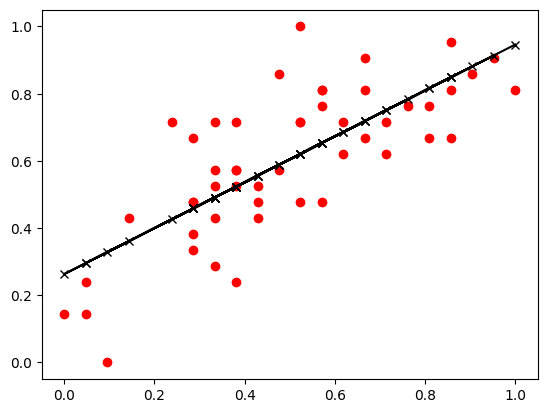

In [91]:
y_pred = model(Variable(x_train_bias))
plt.plot(x_train, y_train.numpy(), 'ro', label='Original data')
plt.plot(x_train, y_pred.data.numpy(), 'kx-', label='Fitting Line')
plt.show()

### Acessando os parâmetros

In [92]:
w_dic = model.state_dict()
w_dic

OrderedDict([('weight', tensor([[0.2631, 0.6830]]))])

### Parâmetros ótimos, solução analítica

In [93]:
x_bias = x_train_bias
y = y_train
x_bias_t = torch.t(x_bias)
w_opt = (torch.inverse(x_bias_t.mm(x_bias)).mm(x_bias_t)).mm(y)
print(torch.t(w_opt))

tensor([[0.2613, 0.6865]])


# Exercícios

- 1) Por que no final da varredura do laço de treinamento, a perda é impressa utilizando
   `loss.data`? Por que precisa do `data`?
   

loss.data é utilizada para imprimir a perda (loss) ao final do laço de treinamento porque o objeto loss é um tensor do PyTorch que contém informações sobre o valor da perda durante a computação do gráfico de autograd. Como a perda vira variable, o loss.data acessa os dados.

Esse tensor tem o valor da perda, informações sobre o histórico de operações realizadas, o que permite a propagação do gradiente e o cálculo dos gradientes durante a retropropagação (backpropagation).

Porém, ao querer apenas o valor numérico da perda para exibição ou log, é necessário acessar o valor armazenado no tensor de forma explícita. O loss.data retorna um tensor com o valor numérico sem o histórico de operações, o que facilita a impressão.

Entretanto, a partir de versões mais recentes do PyTorch (a partir de 1.0), o uso de .data foi desencorajado por questões de segurança e melhores práticas, pois pode levar a resultados inesperados, como a modificação acidental do tensor sem que o gráfico de computação seja atualizado. Atualmente, indica-se usar o método .item():

- 2) Calcule e imprima o valor da perda (MSE) fazendo o predict da rede com os pesos já
   treinados.

In [94]:

# Definir o critério de MSE (erro quadrático médio)
mse_loss = nn.MSELoss()

# Calcular as previsões com os pesos já treinados
with torch.no_grad():
    predictions = model(inputs)

# Calcular a perda MSE
loss_value = mse_loss(predictions, target)

# Imprimir o valor da perda
print(f'Perda (MSE): {loss_value.item()}')

Perda (MSE): 0.021170146763324738


- 3) Crie duas listas `w0_list` e `w1_list` para guardar a evolução dos valores dos
   parâmetros durante o laço de treinamento.
   Modifique o exemplo do gráfico tipo **scatter plot** para visualizar a variação
   dos parâmetros do modelo duas dimensões.
   Marque neste gráfico o valor ótimo do parâmetro dado pela solução
   analítica.

In [95]:
# Número de épocas e taxa de aprendizado
num_epochs = 100
learning_rate = 0.5

# Inicialização das listas para armazenar os valores dos parâmetros
w0_list = []
w1_list = []


# Cálculo da solução analítica para w = (X^T X)^(-1) X^T y
# Converter x_train_bias e y_train para numpy para usar a fórmula analítica
X = x_train_bias.numpy()  # Matriz de entrada com o viés
y = y_train.numpy()  # Vetor alvo

# Cálculo da solução analítica
X_transpose = np.transpose(X)
w_optimal = np.linalg.inv(X_transpose.dot(X)).dot(X_transpose).dot(y)

w0_optimo = w_optimal[0][0]  # w0 (intercepto)
w1_optimo = w_optimal[1][0]  # w1 (coeficiente)

print(f"Valor ótimo (analítico) de w0: {w0_optimo}")
print(f"Valor ótimo (analítico) de w1: {w1_optimo}")


for epoch in range(num_epochs):
  inputs = Variable(x_train_bias)
  target = Variable(y_train)

  # Forward - previsões
  y_pred = model(inputs)  # Passa a entrada no modelo

  # Cálculo da função de perda (MSE)
  loss = torch.mean((y_pred - target)**2)

  # Backward propagation - cálculo do gradiente
  loss.backward()

  # Gradiente descendente
  model.weight.data = model.weight.data - learning_rate * model.weight.grad.data

  # zeragem parâmetros próximo cálculo do gradiente
  model.weight.grad.data.zero_()

  # verbose
  if (epoch+1) % 20 == 0:
      print('Epoch[{}/{}], loss: {:.6f}'
            .format(epoch+1, num_epochs, loss.data))

  # Armazenar os parâmetros a cada época
  w0_list.append(model.weight.data[0][0])  # w0 (intercepto)
  w1_list.append(model.weight.data[0][1])  # w1 (coeficiente)






Valor ótimo (analítico) de w0: 0.2613411843776703
Valor ótimo (analítico) de w1: 0.6864707469940186
Epoch[20/100], loss: 0.021170
Epoch[40/100], loss: 0.021169
Epoch[60/100], loss: 0.021169
Epoch[80/100], loss: 0.021169
Epoch[100/100], loss: 0.021169


A perda (MSE) começa em 0.021170 e se estabiliza a partir da época 20, mantendo o valor de 0.021169 até a última época (época 100). Isso sugere que o modelo já alcançou um ponto onde os parâmetros não estão mais mudando significativamente e a função de perda se estabilizou.




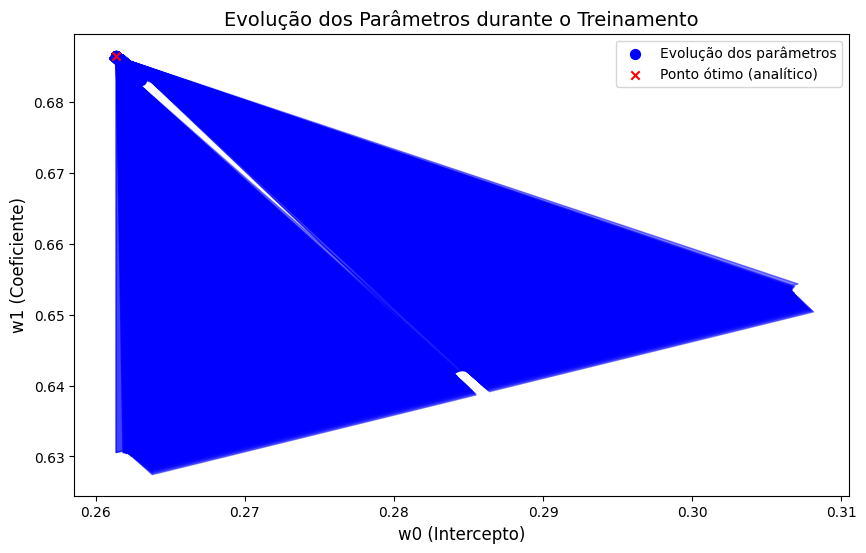

In [96]:
# Visualização dos resultados
plt.figure(figsize=(10, 6))

# Plot dos parâmetros w0 e w1 ao longo das épocas
plt.scatter(w0_list, w1_list, c='blue', label="Evolução dos parâmetros", s=50)

# Desenhando as setas de evolução dos parâmetros
w0_old = None
w1_old = None
for (w0, w1) in zip(w0_list, w1_list):
    if w0_old is not None and w1_old is not None:
        # Desenha a seta entre as iterações
        plt.arrow(w0_old, w1_old, w0 - w0_old, w1 - w1_old,
                  head_length=0.05, head_width=0.05, shape='full',
                  length_includes_head=True, color='blue', alpha=0.5)
    w0_old, w1_old = w0, w1

# Marcando o valor ótimo dos parâmetros
plt.scatter(w0_optimo, w1_optimo, color='red', marker='x', label="Ponto ótimo (analítico)")

# Título e rótulos
plt.title("Evolução dos Parâmetros durante o Treinamento", fontsize=14)
plt.xlabel("w0", fontsize=12)
plt.ylabel("w1", fontsize=12)
plt.legend()

# Exibir o gráfico
plt.show()

## Ploting vectors

In [ ]:
# Exemplo
w0_list = [0.1, 0.15, 0.2, 0.3]
w1_list = [0.1, 0.2, 0.18, 0.3]
plt.scatter(w0_list,w1_list)
w0_old = None
for (w0,w1) in zip(w0_list,w1_list):
    if w0_old:
        plt.arrow(w0_old, w1_old, w0-w0_old, w1-w1_old,
                  head_length=0.01,head_width=0.01,shape='full',
                  length_includes_head=True)
    w0_old,w1_old = w0,w1

# Aprendizados

O presente trabalho utilizou regressão linear para estimar o comprimento das sépalas da íris a partir do comprimento das pétalas.

Para isso, é fundamental importar bibliotecas, realizar a leitura e normalização dos dados, estruturar o modelo, com a verificação da inicialização dos parâmetro e o teste do predict. Ademais, é importante avaliar os dados, com o acesso de parâmentros e o desenvolvimento dos parâmetros ótimos.

Durante o desenvolvimento do estudo guiado, foi necessário pesquisar sobre um atributo da classe Tensor no PyTorch: loss.data, o que demonstrou sua importância histórica.

Também foi calculado o valor da perda (MSE), fazendo o predict da rede com os pesos finais já treinados. Aprender isso é importante porque permite avaliar o desempenho do modelo e sua capacidade de generalizar para dados novos (dados de teste ou validação) que o modelo nunca viu antes, bem como evitar overfitting e underfitting; comparar diferentes modelos ou configurações de treinamento; monitorar o progresso de aprendizado; e aferir a qualidade do modelo treinado.

Por fim, foi criada duas listas w0_list e w1_list para guardar a evolução dos valores dos parâmetros peso durante o laço de treinamento e estruturado um gráfico tipo scatter plot para visualizar a variação. Isso é importante para entender como os pesos da rede estão se ajustando durante o processo de otimização e se o modelo está aprendendo e se os parâmetros estão convergindo de maneira adequada. A convergência significa que os parâmetros estão se aproximando de um valor ótimo, o que é o objetivo final do treinamento.

Caso haja grandes flutuações ou os parâmetros não convergirem para valores estáveis, pode ser um indicativo de overfitting (o modelo está memorizando os dados) ou underfitting (o modelo não está conseguindo aprender adequadamente).

Visualizar a evolução dos pesos também ajuda a ajustar o processo de treinamento, como a taxa de aprendizado ou o número de épocas. Caso os parâmetros não estejam se ajustando corretamente ou estejam indo para direções inesperadas, o gráfico pode ajudar a identificar esses problemas mais rapidamente.

